# Step 3: Data Analysis

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
current_dir = os.getcwd()

In [10]:
for dirpath, dirname, filenames in os.walk(current_dir):
    for filename in filenames:
        print(filename)

creating_dataframe.ipynb
data_analysis.ipynb
data_preprocessing.ipynb
decision_tree_and_random_forest_modelling.ipynb
creating_dataframe-checkpoint.ipynb
data_analysis-checkpoint.ipynb
data_preprocessing-checkpoint.ipynb


In [11]:
df = pd.read_csv('../dataset/preprocessed_q1_2019.csv')

In [12]:
df.shape

(9522894, 33)

In [13]:
df

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
0,2019-01-01,Z305B2QN,ST4000DM000,4000787030016,0,111.0,35673128.0,91.0,0.0,100.0,...,83.0,34169.0,20.0,20.0,100.0,0.0,100.0,0.0,200.0,0.0
1,2019-01-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,83.0,187116872.0,98.0,0.0,100.0,...,99.0,2145.0,28.0,28.0,100.0,0.0,100.0,0.0,200.0,0.0
2,2019-01-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,73.0,19599104.0,99.0,0.0,100.0,...,100.0,363.0,34.0,34.0,100.0,0.0,100.0,0.0,200.0,0.0
3,2019-01-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,81.0,136943696.0,93.0,0.0,100.0,...,100.0,687.0,22.0,22.0,100.0,0.0,100.0,0.0,200.0,0.0
4,2019-01-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,100.0,436.0,100.0,...,100.0,183.0,193.0,31.0,100.0,0.0,100.0,0.0,200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522889,2019-03-31,PL1331LAHD1AWH,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,100.0,0.0,100.0,...,100.0,3.0,250.0,24.0,100.0,0.0,100.0,0.0,200.0,0.0
9522890,2019-03-31,ZA10MCEQ,ST8000DM002,8001563222016,0,72.0,15233376.0,94.0,0.0,100.0,...,100.0,152.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0
9522891,2019-03-31,ZCH0CRTK,ST12000NM0007,12000138625024,0,81.0,122099464.0,97.0,0.0,100.0,...,100.0,677.0,26.0,26.0,100.0,0.0,100.0,0.0,200.0,0.0
9522892,2019-03-31,PL1331LAHD1T5H,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,148.0,490.0,100.0,...,100.0,303.0,181.0,33.0,100.0,0.0,100.0,0.0,200.0,0.0


In [5]:
def find_all_failures(df, serial_number):
    """
    Returns: A subset of the DataFrame containing all rows with 'failure' equal to 1.
    """
    if serial_number not in df['serial_number'].values:
        print(f"Serial number '{serial_number}' not found in the DataFrame.")
        
    ser_num = df[df['serial_number'] == serial_number]
    columns = ['date', 'serial_number', 'failure']
    ser_num = ser_num[columns]
    failures = ser_num[ser_num['failure'] == 1]
    return failures

In [6]:
def total_failures(df, serial_number):
    """
    Returns: The count of total failures from a single hard drive.
    """
    if serial_number not in df['serial_number'].values:
        print(f"Serial number '{serial_number}' not found in the DataFrame.")
        
    ser_num = df[df['serial_number'] == serial_number]
    failure_count = (ser_num['failure'] == 1).sum()
    return failure_count

### Checking the number of unique HDDs

In [56]:
df['serial_number'].nunique()

114574

### Creating a new column 'total_failures' by summing the 'failure' column for each unique HDD

In [57]:
df['total_failures'] = df.groupby('serial_number')['failure'].transform('sum')

In [58]:
df[df['total_failures'] == 1].shape

(18588, 34)

### Checking the number of unique HDDs where their total failure is greater than 1

In [60]:
df[df['total_failures'] > 1]['serial_number'].nunique()

0

## Emulating Backblaze's method to calculate the annual failure rate from their SQL files

### Step 1: Creating a dataframe that has the number of drive days for each model. Drive days refers to the number of days a hard drive has been running (the number of rows in the main dataframe for that model).
### Written in SQL like this:

``` SQL
CREATE TABLE drive_days AS
    SELECT model, count(*) AS drive_days 
    FROM drive_stats 
    GROUP BY model;  
```

In [14]:
# Groups the dataframe by the 'model' column and calculates the size (number of rows) for each group
# The .size() gets the count of occurrences for each model
drive_days = df.groupby('model').size().reset_index(name='drive_days')

# Sort the dataframe by 'drive_days' in descending order
drive_days = drive_days.sort_values(by='drive_days', ascending=False).reset_index(drop=True)

drive_days.head()

,model,drive_days
0,ST12000NM0007,2954794
1,ST4000DM000,1989331
2,ST8000NM0055,1294339
3,HGST HMS5C4040BLE640,1172724
4,ST8000DM002,888712


In [15]:
df[df['model'] == 'ST8000DM004']

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
13816,2019-01-01,WCT0EJDY,ST8000DM004,8001563222016,0,54.0,191168752.0,99.0,0.0,100.0,...,100.0,1306.0,34.0,34.0,100.0,0.0,100.0,0.0,200.0,0.0
55594,2019-01-01,WCT0EJDJ,ST8000DM004,8001563222016,0,84.0,235326880.0,99.0,0.0,100.0,...,100.0,190.0,28.0,28.0,100.0,0.0,100.0,0.0,200.0,0.0
77394,2019-01-01,WCT0EKW3,ST8000DM004,8001563222016,0,84.0,225101728.0,99.0,0.0,100.0,...,100.0,196.0,32.0,32.0,100.0,0.0,100.0,0.0,200.0,0.0
102602,2019-01-01,WCT0EJY6,ST8000DM004,8001563222016,0,71.0,13389032.0,99.0,0.0,100.0,...,100.0,124.0,28.0,28.0,100.0,8.0,100.0,8.0,200.0,0.0
120090,2019-01-02,WCT0EJDY,ST8000DM004,8001563222016,0,54.0,191288728.0,99.0,0.0,100.0,...,100.0,1307.0,34.0,34.0,100.0,0.0,100.0,0.0,200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9388285,2019-03-30,WCT0EKW3,ST8000DM004,8001563222016,0,73.0,209319416.0,99.0,0.0,100.0,...,100.0,343.0,30.0,30.0,100.0,8.0,100.0,8.0,200.0,0.0
9413501,2019-03-30,WCT0EJY6,ST8000DM004,8001563222016,0,77.0,202578152.0,99.0,0.0,100.0,...,100.0,243.0,29.0,29.0,100.0,8.0,100.0,8.0,200.0,0.0
9472343,2019-03-31,WCT0EJDJ,ST8000DM004,8001563222016,0,77.0,56104136.0,98.0,0.0,100.0,...,100.0,278.0,27.0,27.0,100.0,0.0,100.0,0.0,200.0,0.0
9494059,2019-03-31,WCT0EKW3,ST8000DM004,8001563222016,0,78.0,228606704.0,99.0,0.0,100.0,...,100.0,344.0,30.0,30.0,100.0,8.0,100.0,8.0,200.0,0.0


In [16]:
drive_days[drive_days['model'] == 'ST8000DM004']

,model,drive_days
30,ST8000DM004,273


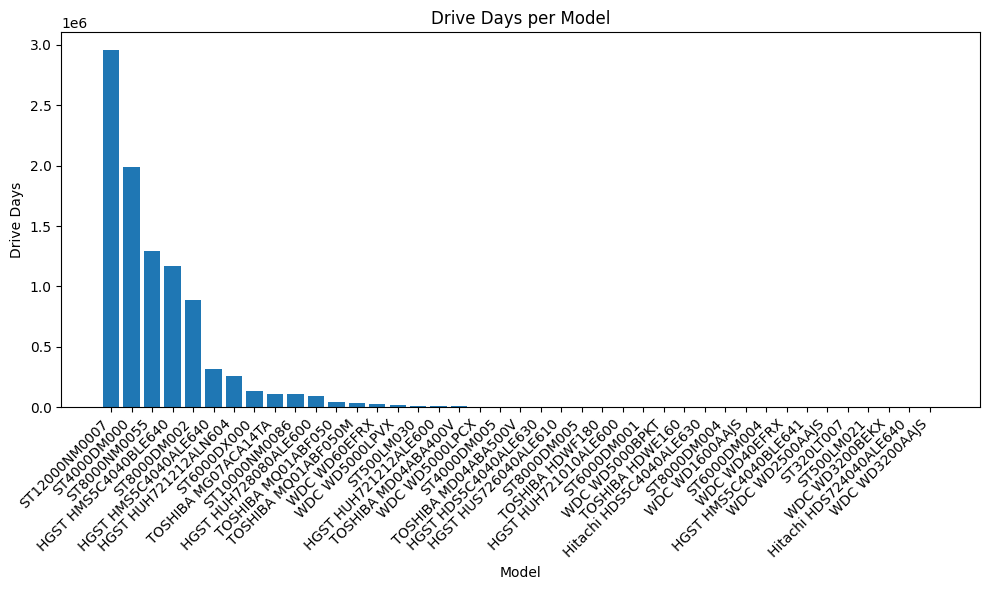

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(drive_days['model'], drive_days['drive_days'])
plt.xlabel('Model')
plt.ylabel('Drive Days')
plt.title('Drive Days per Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
# Total drive days across all models (which is also the total rows)
total_drive_days = len(df)
print(f'Total drive days across all models: {total_drive_days}')

Total drive days across all models: 9522894


### Step 2: Creating a dataframe that has the number of failures for each model.
### Written in SQL like this:

``` SQL
CREATE TABLE failures AS
    SELECT model, count(*) AS failures
    FROM drive_stats
    WHERE failure = 1
    GROUP BY model;
```

In [19]:
failures = df[df['failure'] == 1].groupby('model').size().reset_index(name='failures')
failures = failures.sort_values(by='failures', ascending=False).reset_index(drop=True)
failures.head()

,model,failures
0,ST12000NM0007,174
1,ST4000DM000,105
2,ST8000NM0055,57
3,ST8000DM002,27
4,TOSHIBA MQ01ABF050,13


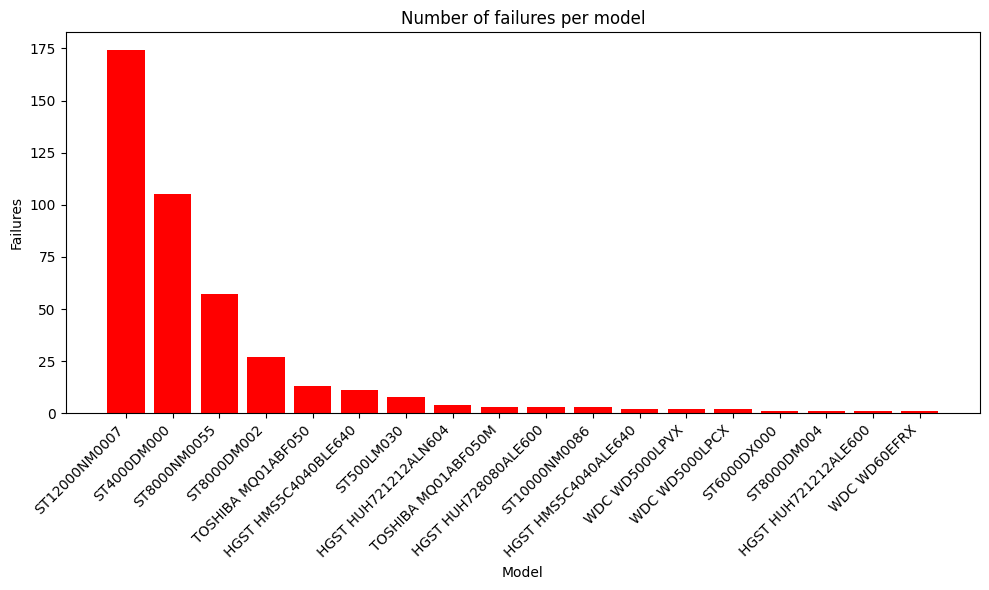

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(failures['model'], failures['failures'], color='red')
plt.xlabel('Model')
plt.ylabel('Failures')
plt.title('Number of failures per model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### More data analysis

In [21]:
# Calculating the total failures
total_failures = (df['failure'] == 1).sum()
print(f'Total failures: {total_failures}')

# Calculating the total unique days
total_unique_days = df['date'].nunique()
print(f'Total unique days: {total_unique_days}')

print(f'Total drive days: {total_drive_days}')

print(f'So we have {total_failures} failures in {total_drive_days} drive days of operation.')

Total failures: 418
Total unique days: 90
Total drive days: 9522894
So we have 418 failures in 9522894 drive days of operation.


The daily failure rate is the drive failures / drive days. The annual failure rate would be the daily failure rate * 365 (assuming the rest of the year would have similar results to the first 3 months)

In [25]:
daily_failure_rate = (total_failures / total_drive_days) * 100
annual_failure_rate = daily_failure_rate * 365

print(f'Daily failure rate is {daily_failure_rate}%')
print(f'Annual failure rate is {annual_failure_rate}%')

Daily failure rate is 0.004389421955132547%
Annual failure rate is 1.6021390136233797%


### Step 3: Creating a table that has the number of drives for each model as of the last day in the dataset
### In my case, that is 31st March 2019
### Written in SQL like this:

``` SQL
CREATE TABLE model_count AS
    SELECT model, count(*) AS count
    FROM drive_stats
    WHERE date = '2019-03-31'
    GROUP BY model;
```

In [27]:
# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Filter rows for specific date and calculate the number of drives for each model
model_count = df[df['date'] == '2019-03-31'].groupby('model').size().reset_index(name='count')

# Sort the dataframe by 'count' in descending order
model_count = model_count.sort_values(by='count', ascending=False).reset_index(drop=True)
model_count.head()

,model,count
0,ST12000NM0007,34708
1,ST4000DM000,19785
2,ST8000NM0055,14381
3,HGST HMS5C4040BLE640,12753
4,ST8000DM002,9874


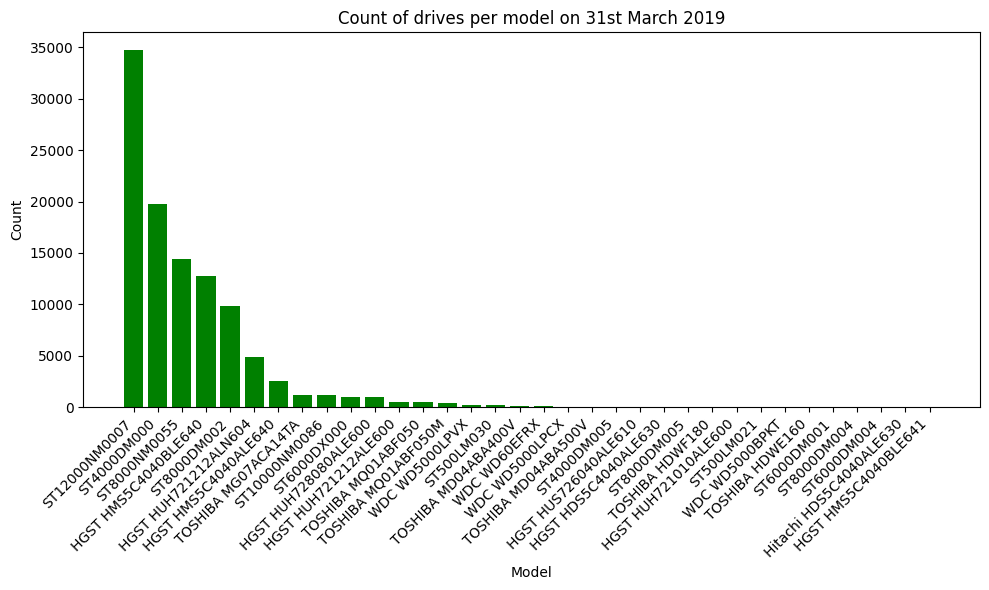

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(model_count['model'], model_count['count'], color='green')
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Count of drives per model on 31st March 2019')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Join the tables together and compute the annual failure rate
### drive_years = drive_days / 365
### Annual failure rate = (number of failures / number of drive years) * 100
### Written in SQL like this:

``` SQL
CREATE TABLE failure_rates AS
    SELECT drive_days.model AS model,
           drive_days.drive_days AS drive_days,
           failures.failures AS failures, 
           100.0 * (1.0 * failures) / (drive_days / 365.0) AS annual_failure_rate
    FROM drive_days, failures, model_count
    WHERE drive_days.model = failures.model
      AND model_count.model = failures.model
    ORDER BY model;
```

In [29]:
# Merge dataframes
# The on='model' argument in the pd.merge function indicates that the merge should be performed 
# based on the model column, and only rows with matching model values in both DataFrames will 
# be included in the result.
merged_df = pd.merge(drive_days, failures, on='model')
merged_df = pd.merge(merged_df, model_count, on='model')
merged_df.head()

,model,drive_days,failures,count
0,ST12000NM0007,2954794,174,34708
1,ST4000DM000,1989331,105,19785
2,ST8000NM0055,1294339,57,14381
3,HGST HMS5C4040BLE640,1172724,11,12753
4,ST8000DM002,888712,27,9874


In [30]:
# Calculate annual failure rate
failure_rates = merged_df.copy()
failure_rates['drive_years'] = failure_rates['drive_days'] / 365
failure_rates['annual_failure_rate (%)'] = (failure_rates['failures'] / failure_rates['drive_years']) * 100

failure_rates.head()

,model,drive_days,failures,count,drive_years,annual_failure_rate (%)
0,ST12000NM0007,2954794,174,34708,8095.326027,2.149388
1,ST4000DM000,1989331,105,19785,5450.221918,1.926527
2,ST8000NM0055,1294339,57,14381,3546.134247,1.607384
3,HGST HMS5C4040BLE640,1172724,11,12753,3212.942466,0.342365
4,ST8000DM002,888712,27,9874,2434.827397,1.108908


In [31]:
# Removing the count column
if 'count' in failure_rates.columns:
    failure_rates.drop('count', axis=1, inplace=True)
    print('Count column dropped')
else:
    print('Count column does not exist')

Count column dropped


### Moving the drive_years column next to the drive_days column

In [32]:
column_to_move = 'drive_years'
new_order = [col for col in failure_rates.columns if col != column_to_move]

In [33]:
new_order

['model', 'drive_days', 'failures', 'annual_failure_rate (%)']

In [34]:
new_order.insert(2, column_to_move)  # Insert 'drive_years' at index 2

In [35]:
new_order

['model', 'drive_days', 'drive_years', 'failures', 'annual_failure_rate (%)']

In [36]:
failure_rates = failure_rates[new_order]

In [37]:
failure_rates.head()

,model,drive_days,drive_years,failures,annual_failure_rate (%)
0,ST12000NM0007,2954794,8095.326027,174,2.149388
1,ST4000DM000,1989331,5450.221918,105,1.926527
2,ST8000NM0055,1294339,3546.134247,57,1.607384
3,HGST HMS5C4040BLE640,1172724,3212.942466,11,0.342365
4,ST8000DM002,888712,2434.827397,27,1.108908


In [38]:
failure_rates.sort_values(by='model').reset_index(drop=True).head()

,model,drive_days,drive_years,failures,annual_failure_rate (%)
0,HGST HMS5C4040ALE640,313365,858.534247,2,0.232955
1,HGST HMS5C4040BLE640,1172724,3212.942466,11,0.342365
2,HGST HUH721212ALE600,14040,38.465753,1,2.599715
3,HGST HUH721212ALN604,259370,710.602740,4,0.562902
4,HGST HUH728080ALE600,93598,256.432877,3,1.169897


In [39]:
sorted_AFR = failure_rates.sort_values(by='annual_failure_rate (%)', ascending=False).reset_index(drop=True)
sorted_AFR.head()

,model,drive_days,drive_years,failures,annual_failure_rate (%)
0,ST8000DM004,273,0.747945,1,133.699634
1,ST500LM030,14479,39.668493,8,20.167139
2,WDC WD5000LPCX,4920,13.479452,2,14.837398
3,TOSHIBA MQ01ABF050,46969,128.682192,13,10.102408
4,TOSHIBA MQ01ABF050M,32624,89.380822,3,3.356425


### Analysing the Annual Failure Rate per model

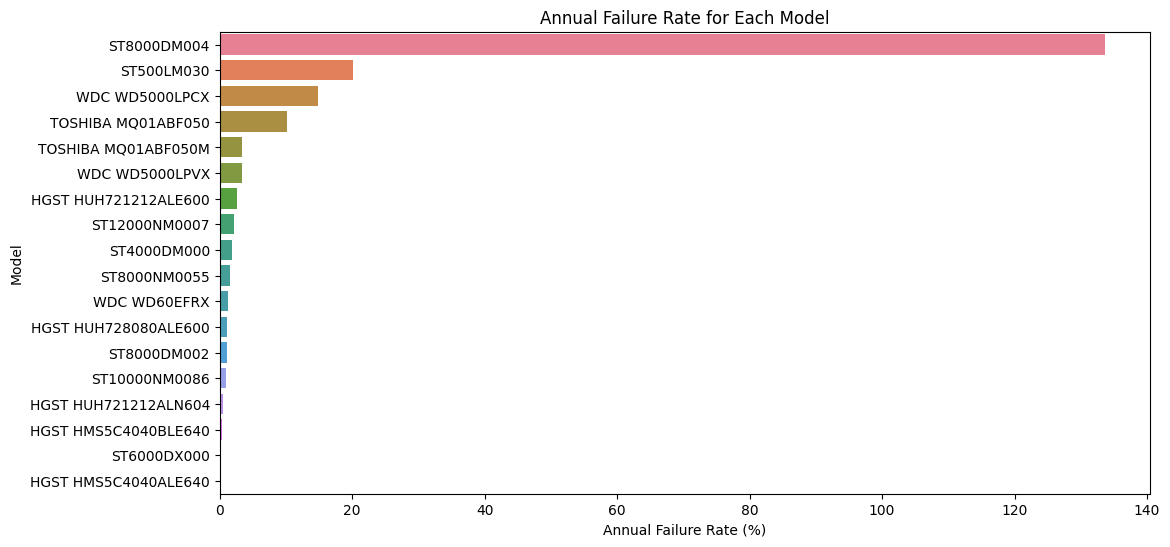

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x='annual_failure_rate (%)', y='model', hue='model', data=sorted_AFR)
plt.title('Annual Failure Rate for Each Model')
plt.xlabel('Annual Failure Rate (%)')
plt.ylabel('Model')
plt.show()

### Removing the outlier model that has an annual failure rate of 134% (though its not too accurate because it has only had 1 failure and lasted 273 days

In [41]:
AFR_without_outlier = sorted_AFR.copy()  

if 'ST8000DM004' in AFR_without_outlier['model'].values:
    AFR_without_outlier.drop(AFR_without_outlier[AFR_without_outlier['model'] == 'ST8000DM004'].index, inplace=True)
    print('Row with model ST8000DM004 dropped')
else:
    print('Row with model ST8000DM004 does not exist')

Row with model ST8000DM004 dropped


In [42]:
AFR_without_outlier.reset_index(drop=True).head()

,model,drive_days,drive_years,failures,annual_failure_rate (%)
0,ST500LM030,14479,39.668493,8,20.167139
1,WDC WD5000LPCX,4920,13.479452,2,14.837398
2,TOSHIBA MQ01ABF050,46969,128.682192,13,10.102408
3,TOSHIBA MQ01ABF050M,32624,89.380822,3,3.356425
4,WDC WD5000LPVX,22015,60.315068,2,3.315921


### Analysing the annual failure rate per model without model ST8000DM004 (outlier)

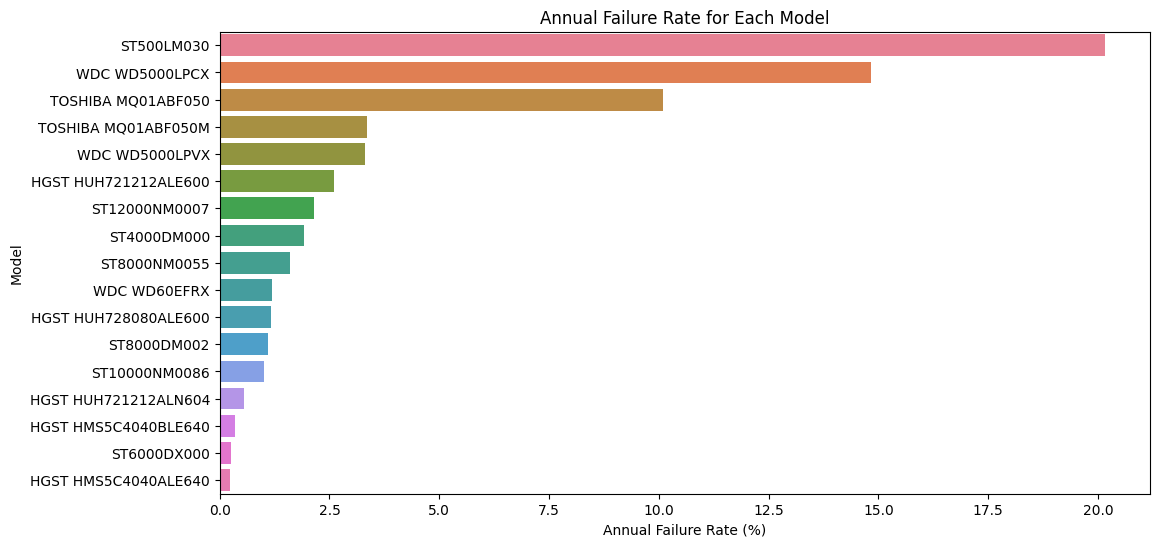

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x='annual_failure_rate (%)', y='model', hue='model', data=AFR_without_outlier)
plt.title('Annual Failure Rate for Each Model')
plt.xlabel('Annual Failure Rate (%)')
plt.ylabel('Model')
plt.show()

### Drive years per model

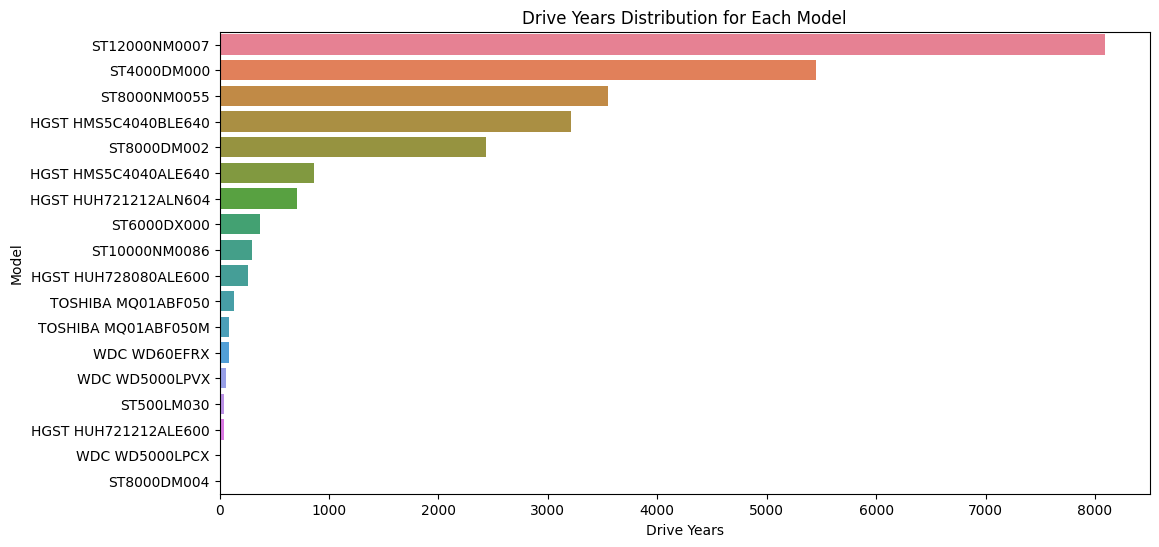

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x='drive_years', y='model', hue='model', data=failure_rates)
plt.title('Drive Years Distribution for Each Model')
plt.xlabel('Drive Years')
plt.ylabel('Model')
plt.show()

### Failures per model

In [45]:
sorted_failures = failure_rates.sort_values(by='failures', ascending=False).reset_index(drop=True)
sorted_failures.head()

,model,drive_days,drive_years,failures,annual_failure_rate (%)
0,ST12000NM0007,2954794,8095.326027,174,2.149388
1,ST4000DM000,1989331,5450.221918,105,1.926527
2,ST8000NM0055,1294339,3546.134247,57,1.607384
3,ST8000DM002,888712,2434.827397,27,1.108908
4,TOSHIBA MQ01ABF050,46969,128.682192,13,10.102408


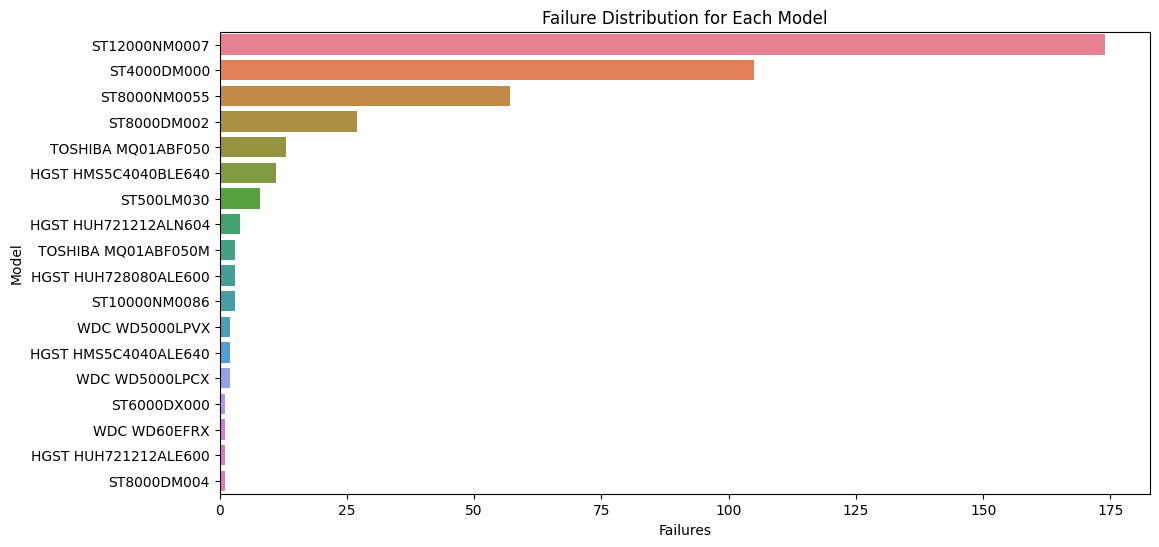

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(x='failures', y='model', hue='model', data=sorted_failures)
plt.title('Failure Distribution for Each Model')
plt.xlabel('Failures')
plt.ylabel('Model')
plt.show()

### Scatter plot of each model's drive year to failures

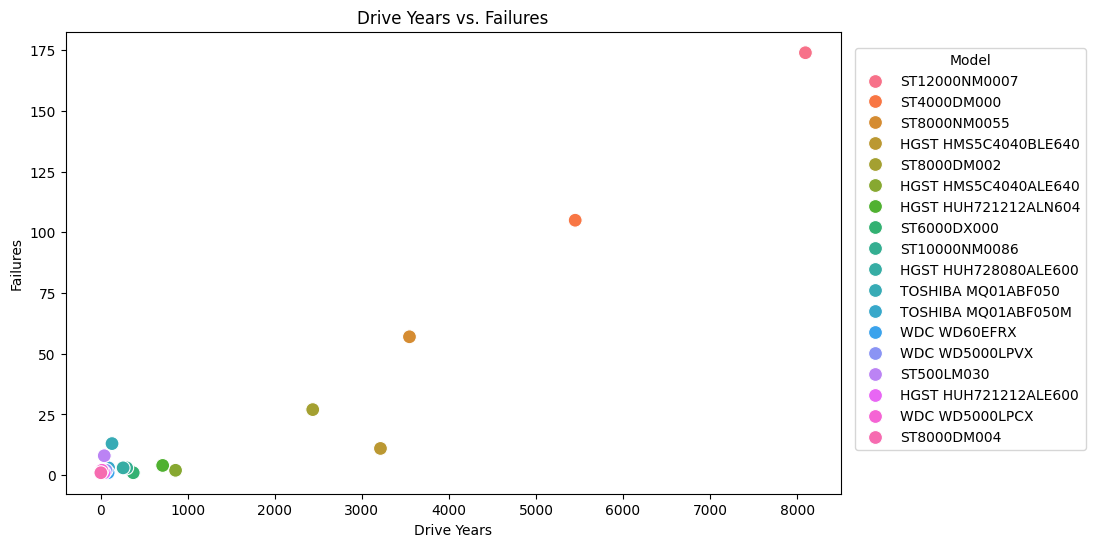

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=failure_rates['drive_years'], y=failure_rates['failures'], hue='model', data=failure_rates, s=100)
plt.title('Drive Years vs. Failures')
plt.xlabel('Drive Years')
plt.ylabel('Failures')
plt.legend(title='Model', bbox_to_anchor=(1.01, 0.98), loc='upper left')
plt.show()

### Testing out rule 2 on table 6 from https://www.kdd.org/kdd2016/papers/files/adf0849-botezatuA.pdf
### What it says is that if the hard drive is a Seagate model and the smart_197_raw sensor has a value >= 2, then the drive should be replaced with 100% confidence rate.
### The models that start with 'ST' are Seagate models

In [48]:
filtered_df = df[(df['model'].str.startswith('ST') & (df['smart_197_raw'] >= 2))].reset_index(drop=True)

In [49]:
filtered_df = filtered_df[['date', 'serial_number', 'model', 'failure', 'smart_197_raw']]

In [50]:
filtered_df.head()

,date,serial_number,model,failure,smart_197_raw
0,2019-01-01,ZCH05KWT,ST12000NM0007,0,88.0
1,2019-01-01,ZA11TXM3,ST8000DM002,0,24.0
2,2019-01-01,ZA17ZNMY,ST8000NM0055,0,16.0
3,2019-01-01,S300YQTN,ST4000DM000,0,16.0
4,2019-01-01,Z30250QJ,ST4000DM000,0,16.0


In [51]:
filtered_df.tail()

,date,serial_number,model,failure,smart_197_raw
42548,2019-03-31,ZJV04Q83,ST12000NM0007,0,8.0
42549,2019-03-31,ZA14BWTZ,ST8000NM0055,0,8.0
42550,2019-03-31,ZA180Y1V,ST8000NM0055,0,8.0
42551,2019-03-31,ZCH0B7KM,ST12000NM0007,0,8.0
42552,2019-03-31,ZA1814CT,ST8000NM0055,0,8.0


In [52]:
filtered_df.shape

(42553, 5)

In [53]:
filtered_df[filtered_df['failure'] == 1]

,date,serial_number,model,failure,smart_197_raw
317,2019-01-01,S300ZREZ,ST4000DM000,1,24.0
787,2019-01-02,Z302T6AB,ST4000DM000,1,424.0
803,2019-01-02,Z3026Q5Y,ST4000DM000,1,32.0
929,2019-01-03,W300THEG,ST4000DM000,1,8.0
1770,2019-01-04,ZA18145R,ST8000NM0055,1,8.0
...,...,...,...,...,...
41040,2019-03-28,Z304KCJZ,ST4000DM000,1,16.0
41442,2019-03-29,Z302SZLQ,ST4000DM000,1,64.0
41483,2019-03-29,S301NGZN,ST4000DM000,1,16.0
41568,2019-03-29,ZA17G86N,ST8000NM0055,1,64.0


In [54]:
filtered_df[filtered_df['serial_number'] == 'ZA18145R']

,date,serial_number,model,failure,smart_197_raw
406,2019-01-01,ZA18145R,ST8000NM0055,0,8.0
862,2019-01-02,ZA18145R,ST8000NM0055,0,8.0
1316,2019-01-03,ZA18145R,ST8000NM0055,0,8.0
1770,2019-01-04,ZA18145R,ST8000NM0055,1,8.0


### 125 of 42,553 Seagate hard drives failed within the first 3 months of 2019 that had a smart_197_raw value >=2. Maybe should test it out on the whole Q1 data. If still giving the same results, try on Q2 data.